In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
BASE_URL = "https://fastwork.co/"

In [3]:
main_cat_urls = [
    'design-graphic',
    'marketing-advertising',
    'writing-translation',
    'photography-video',
    'web-programming',
    'consultant',
    'operation'
]

In [4]:
def retrieve_products(subcat_slug,page=0):
    url = "https://f24luz3xrm-dsn.algolia.net/1/indexes/th_prod_products/query"
    params = {
        "x-algolia-agent":"Algolia for JavaScript (3.35.1); Browser",
        "x-algolia-application-id":"F24LUZ3XRM",
        "x-algolia-api-key":"a639c2213baa3a66e57cee665d7e17a6"
    }
    data = {
        "attributesToRetrieve": ["*"],
        "facets": ["subcategory.title","subcategory.slug","base_price","user.first_name","tags"],
        "filters":"(subcategory.slug: {})".format(subcat_slug),
        "hitsPerPage":"500",
        "page":"{}".format(page),
        "query":"",
    }
    response = requests.post(url,params=params,json=data)
    return response.json()['hits']

In [5]:
def retrieve_products_all(subcat_slug):
    page = 0
    
    output = []
    data = retrieve_products(sub_cat_slug)
    while len(data)>0:
        output += data
        page += 1
        data = retrieve_products(sub_cat_slug,page)
    return output
    

In [6]:
df_lists = []
for main_cat_url in main_cat_urls:
    response = requests.get(BASE_URL+main_cat_url)
    soup = BeautifulSoup(response.content, "html.parser")
    dom = soup.find_all('div',attrs={"class":"category-list"})
    sub_cat_links = dom[0].find_all('a')
    print("#{}".format(main_cat_url))
    
    for link in sub_cat_links:
        sub_cat_slug = link.attrs['href'].replace("/","")
        
#         response = retrieve_products(sub_cat_slug)
#         data = response.json()['hits']
        data = retrieve_products_all(sub_cat_slug)
        
        print("##{} - Count : {}".format(sub_cat_slug,len(data)))
        df = pd.DataFrame(data)
        df['category'] = main_cat_url
        df['subcategory']= sub_cat_slug
        df_lists.append(df)
        
df_all = pd.concat(df_lists)

#design-graphic
##logo-design - Count : 1056
##illustration - Count : 767
##social-media-banner - Count : 1600
##character-design - Count : 294
##packaging - Count : 285
##fanart - Count : 266
##illustration-portrait - Count : 705
##engineering-structural-design - Count : 474
##caricature - Count : 34
##architect-and-interior - Count : 436
##cartoon-drawing - Count : 382
##presentation - Count : 490
##vector-illustration - Count : 64
##publication - Count : 595
##vector - Count : 78
##storyboard - Count : 15
##fashion-design - Count : 153
##tattoo-design - Count : 27
##infographics - Count : 378
##map-design - Count : 53
##photoshop - Count : 643
##game-character-bg - Count : 23
##sticker - Count : 41
##perspective - Count : 433
##3d-model - Count : 191
##line-sticker - Count : 206
##portfolio-resume - Count : 290
##corporate-identity - Count : 30
##landscape - Count : 34
##nft-art - Count : 5
##design-graphic-other - Count : 31
#marketing-advertising
##seo - Count : 136
##promote-page

In [7]:
labels = [i for i in range(0, 50000, 500)]

In [8]:
df_all['bin_price'] = pd.cut(df_all['base_price'],bins=range(0,50500,500),right=False,labels=labels)

In [9]:
df_group = df_all[['category','subcategory','bin_price']].groupby(['category','subcategory','bin_price']).size().to_frame('size').reset_index()

In [10]:
df_group = df_group[df_group['size']>0]
# df_group = df_group.rename({"0":"size"})

In [11]:
display(df_group)

,category,subcategory,bin_price,size
101,consultant,accounting-and-finance,500,42
102,consultant,accounting-and-finance,1000,15
103,consultant,accounting-and-finance,1500,13
104,consultant,accounting-and-finance,2000,10
105,consultant,accounting-and-finance,2500,17
...,...,...,...,...
75513,writing-translation,writing-translation-other,6500,1
75520,writing-translation,writing-translation-other,10000,2
75524,writing-translation,writing-translation-other,12000,1
75530,writing-translation,writing-translation-other,15000,1


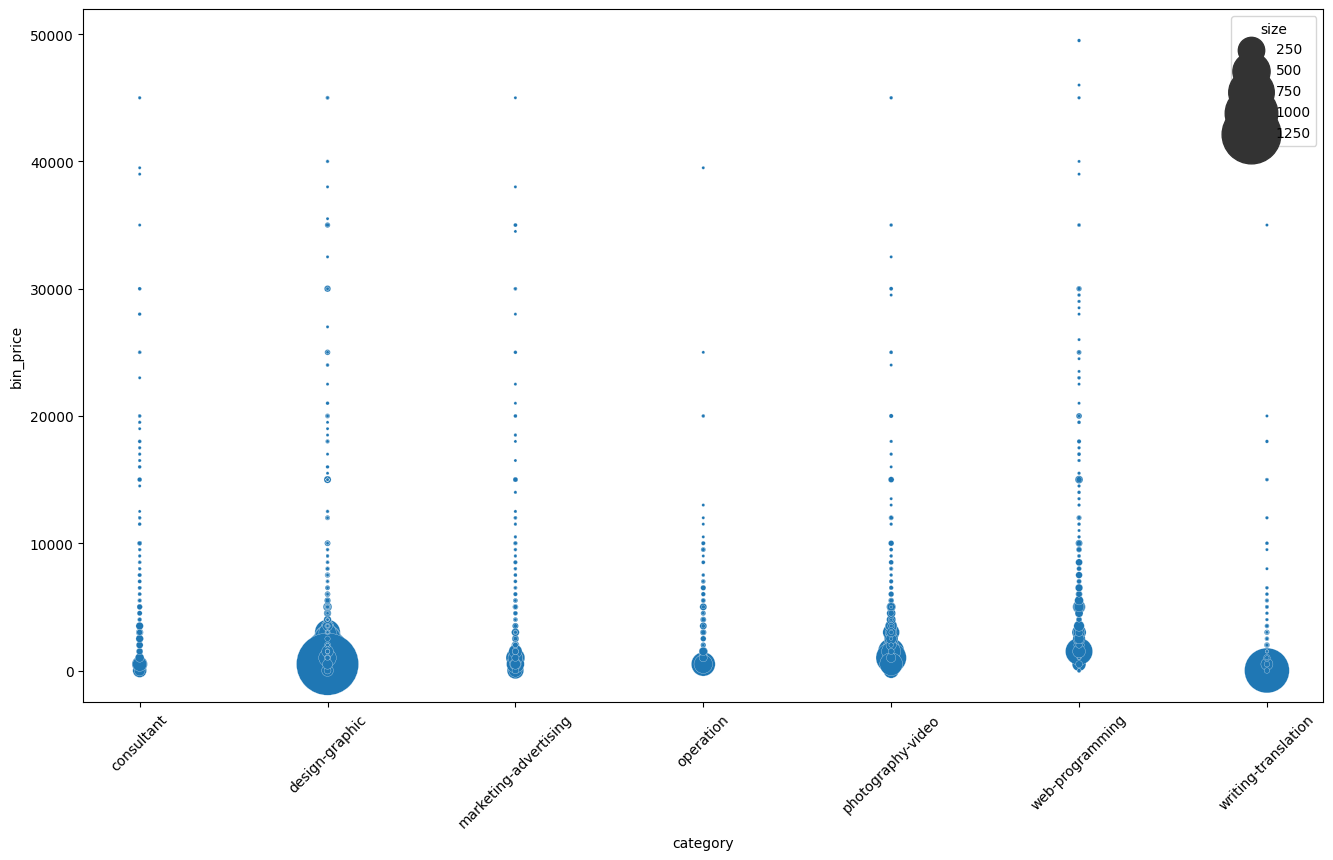

In [18]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=45)
ax = sns.scatterplot(df_group,x="category",y="bin_price", size="size", sizes=(5, 2000))
ax.tick_params(axis='y',which='both')
ax.invert_yaxis()
# ax = sns.swarmplot(df_group,x="category",y="bin_price",hue="subcategory")
plt.savefig("price_market.png")

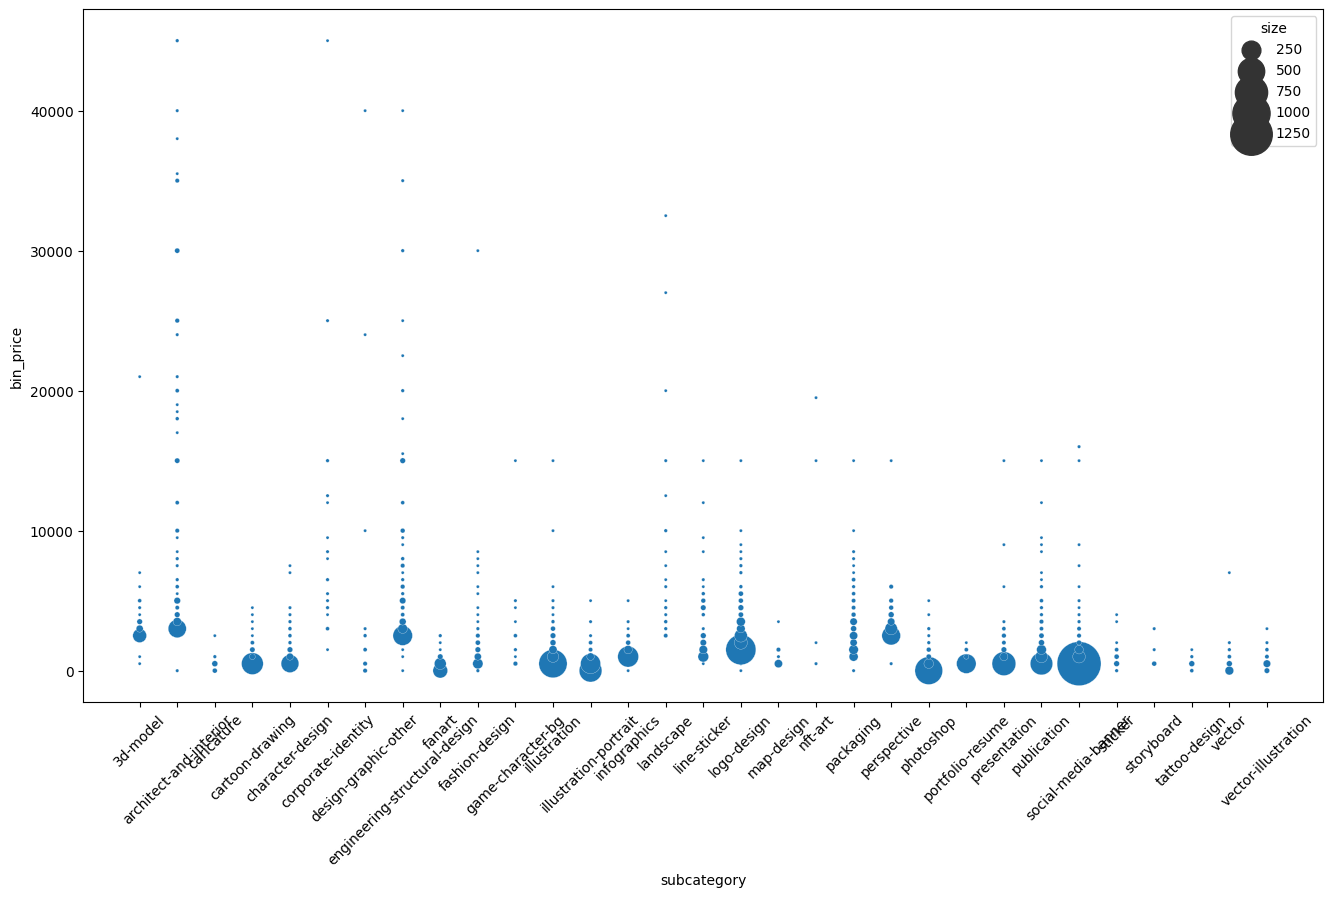

In [19]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=45)
ax = sns.scatterplot(df_group[df_group['category']=='design-graphic'],x="subcategory",y="bin_price", size="size", sizes=(5, 1000))
ax.tick_params(axis='y',which='both')
ax.invert_yaxis()
# ax = sns.swarmplot(df_group,x="category",y="bin_price",hue="subcategory")
plt.savefig("price_market-design-graphic.png")

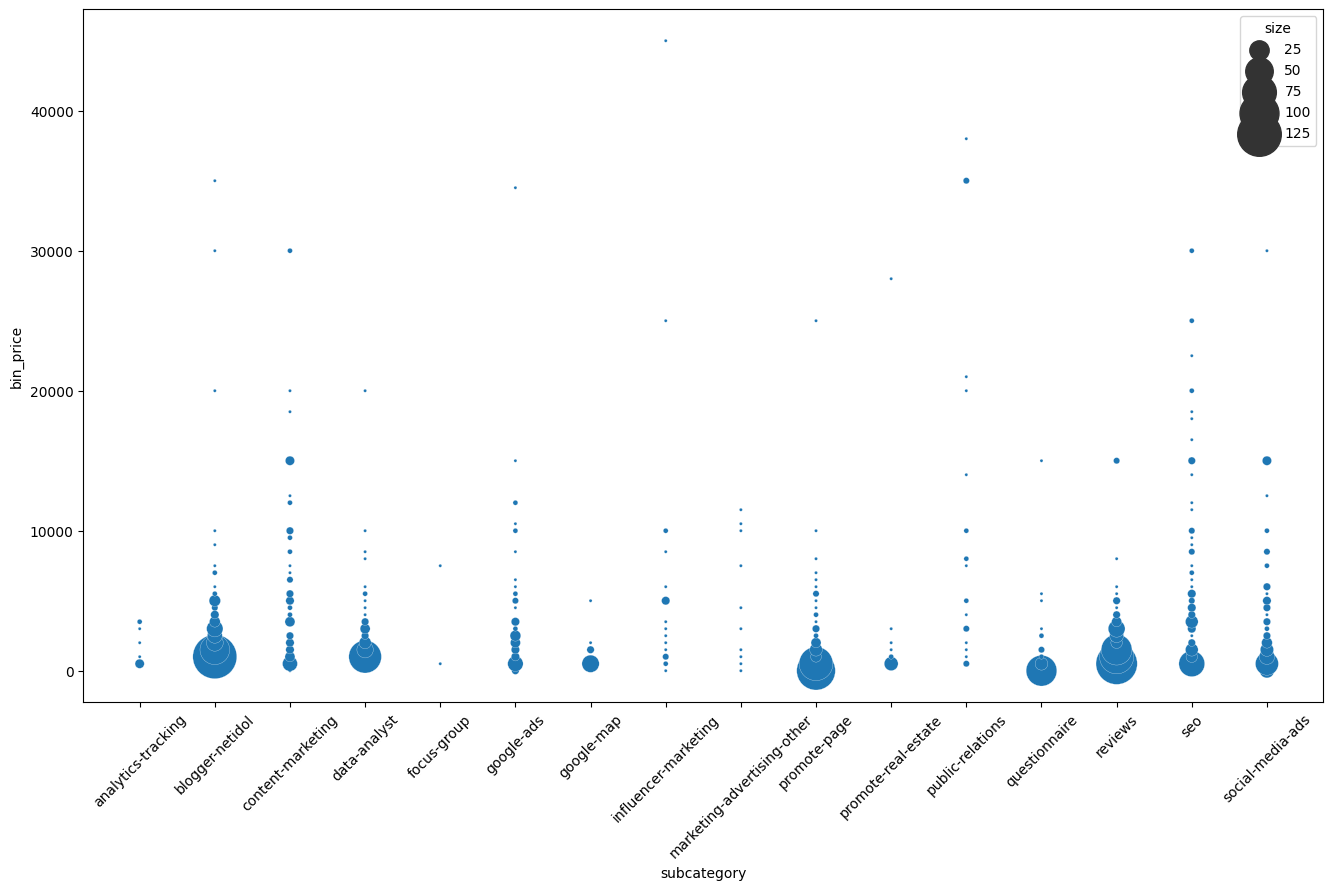

In [20]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=45)
ax = sns.scatterplot(df_group[df_group['category']=='marketing-advertising'],x="subcategory",y="bin_price", size="size", sizes=(5, 1000))
ax.tick_params(axis='y',which='both')
ax.invert_yaxis()
plt.savefig("price_market-marketing-advertising.png")

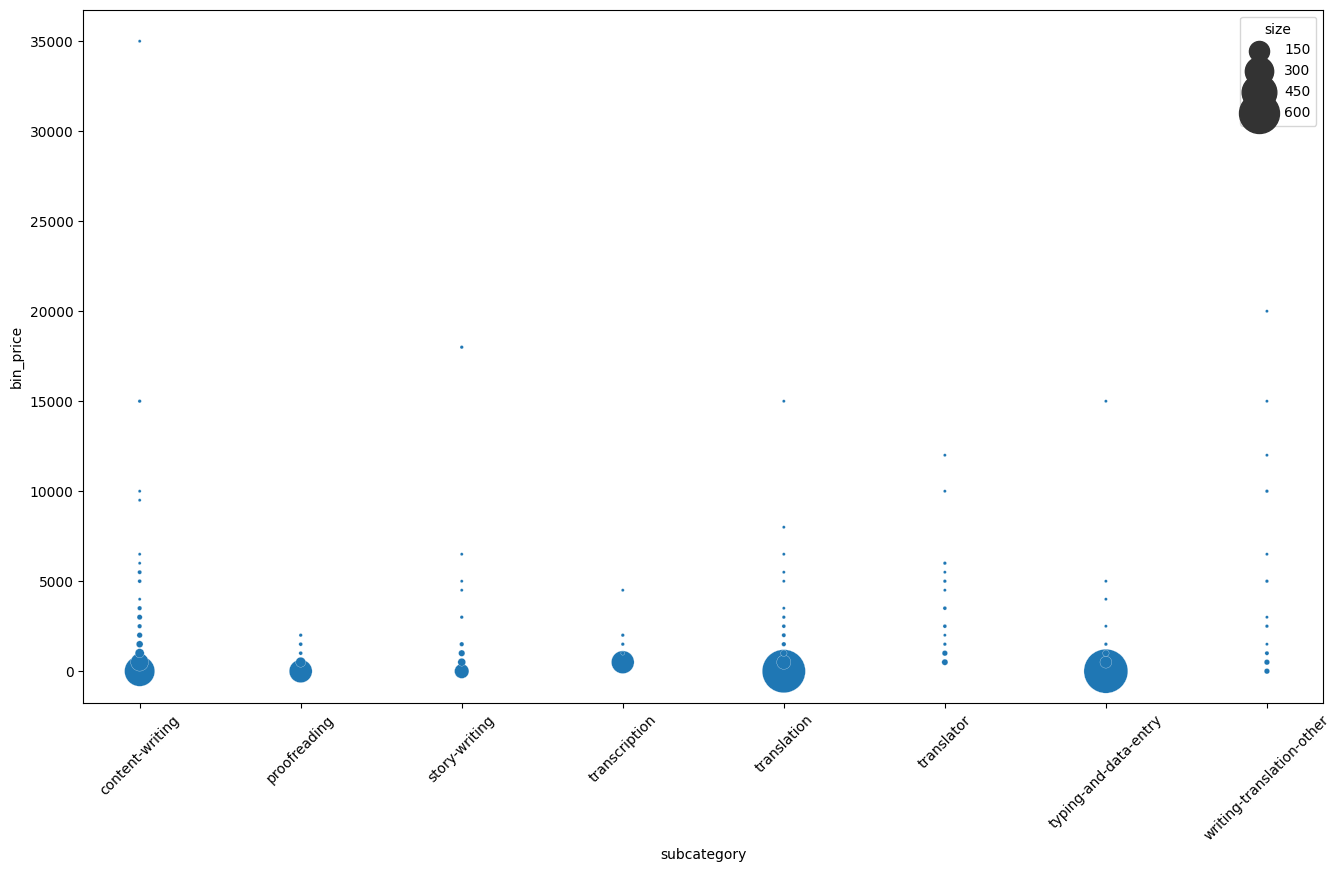

In [21]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=45)
ax = sns.scatterplot(df_group[df_group['category']=='writing-translation'],x="subcategory",y="bin_price", size="size", sizes=(5, 1000))
ax.tick_params(axis='y',which='both')
ax.invert_yaxis()
plt.savefig("price_market-writing-translation.png")

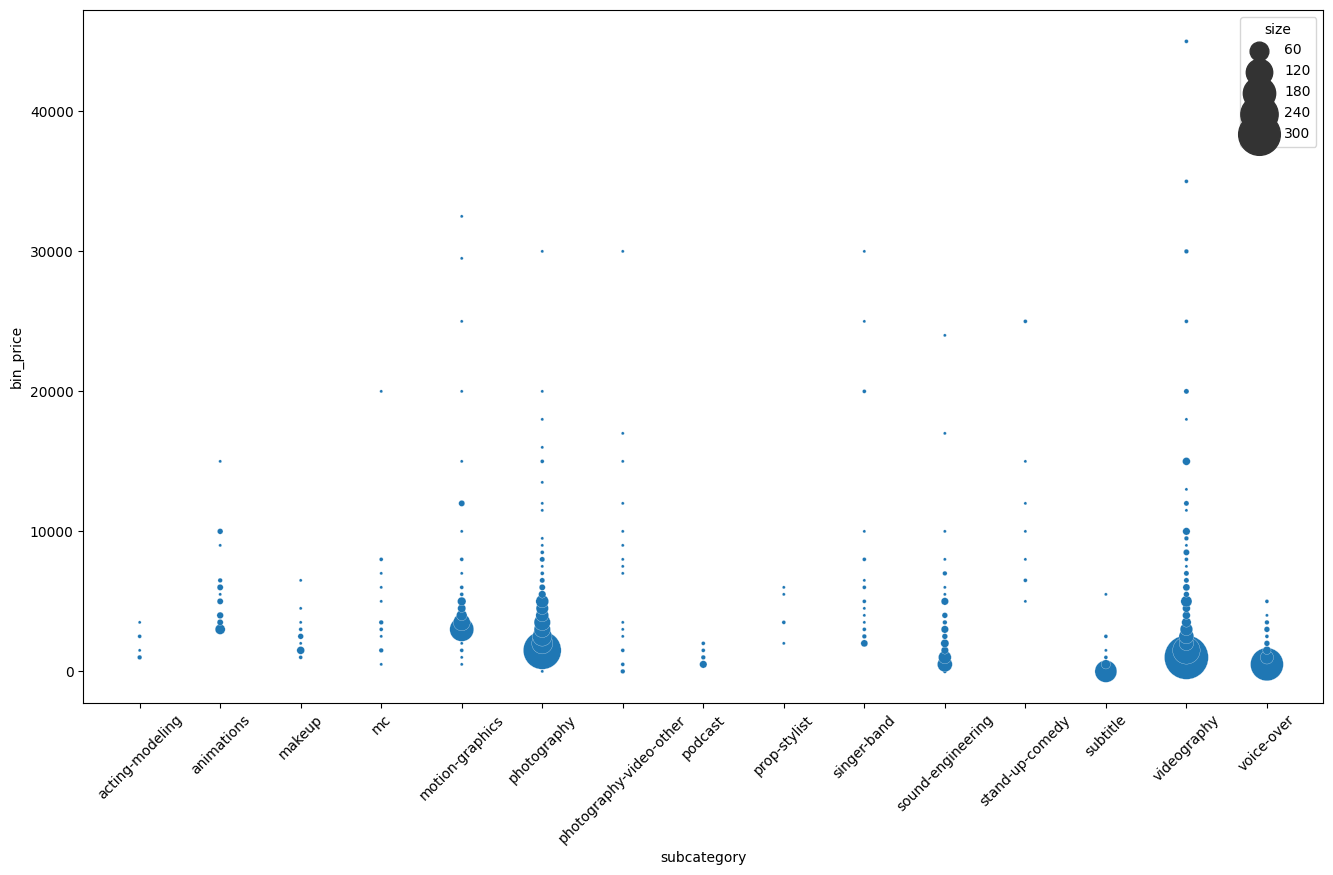

In [22]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=45)
ax = sns.scatterplot(df_group[df_group['category']=='photography-video'],x="subcategory",y="bin_price", size="size", sizes=(5, 1000))
ax.tick_params(axis='y',which='both')
ax.invert_yaxis()
plt.savefig("price_market-photography-video.png")

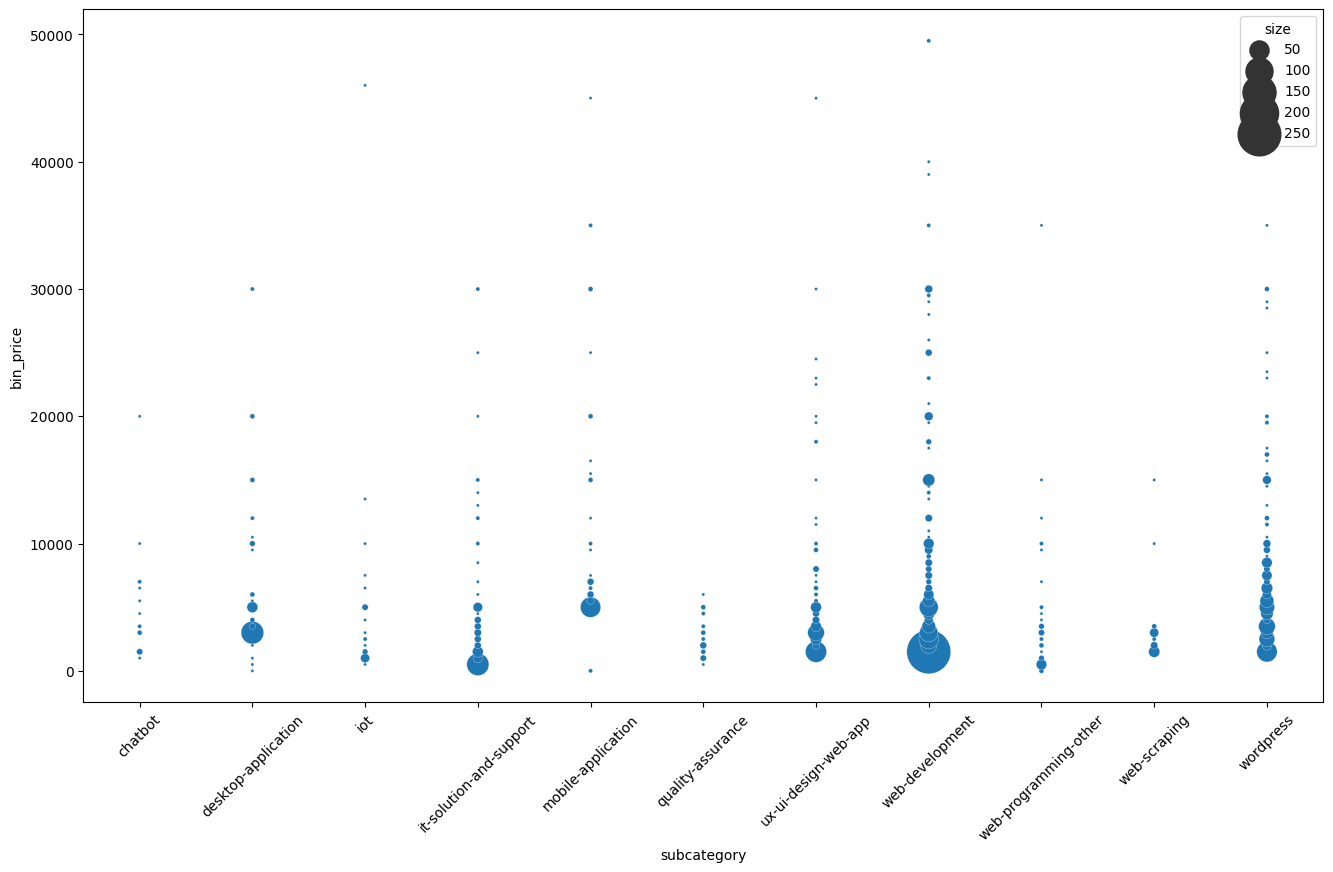

In [24]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=45)
ax = sns.scatterplot(df_group[df_group['category']=='web-programming'],x="subcategory",y="bin_price", size="size", sizes=(5, 1000))
ax.tick_params(axis='y',which='both')
ax.invert_yaxis()
plt.savefig("price_market-web-programming.png")

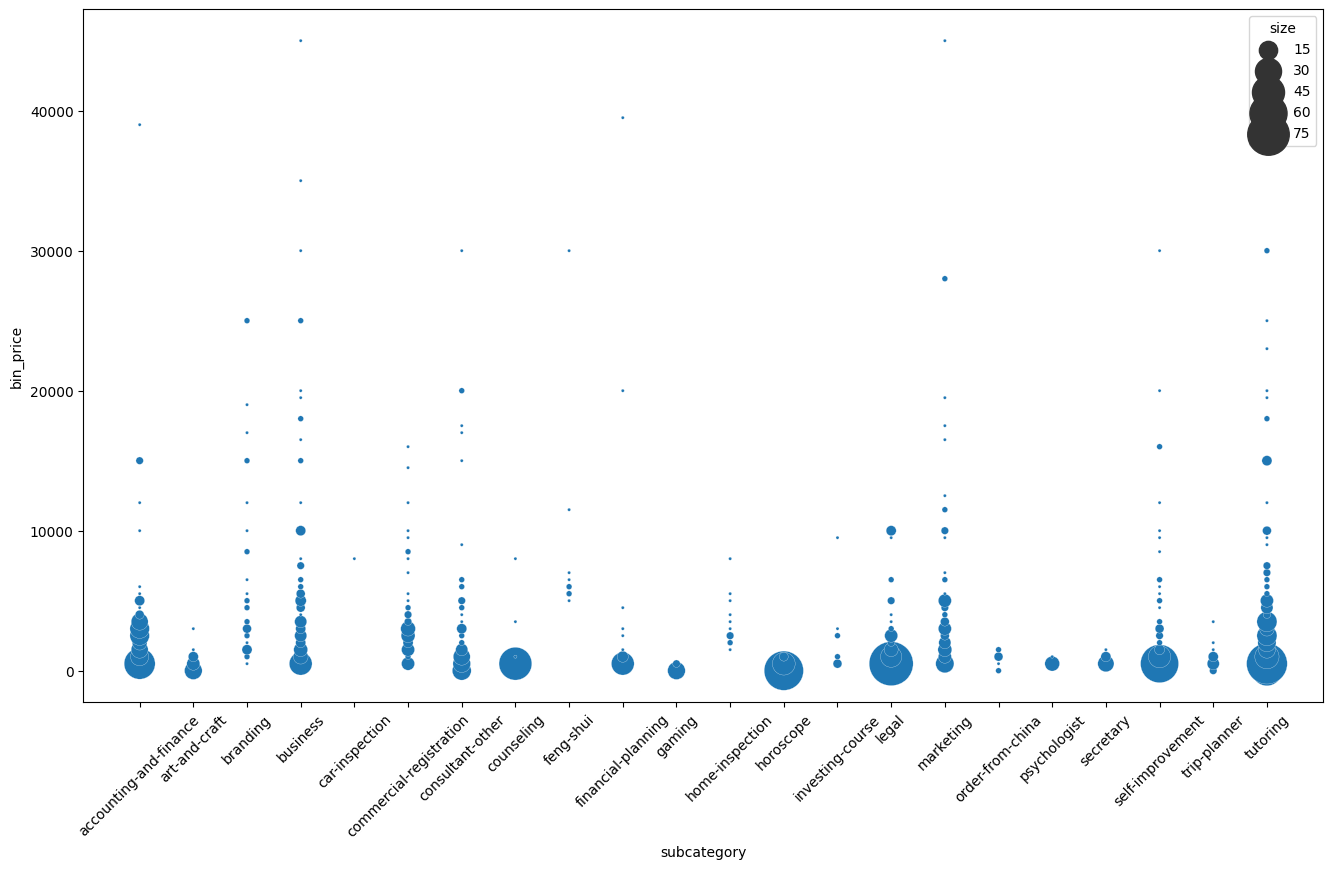

In [25]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=45)
ax = sns.scatterplot(df_group[df_group['category']=='consultant'],x="subcategory",y="bin_price", size="size", sizes=(5, 1000))
ax.tick_params(axis='y',which='both')
ax.invert_yaxis()
plt.savefig("price_market-consultant.png")

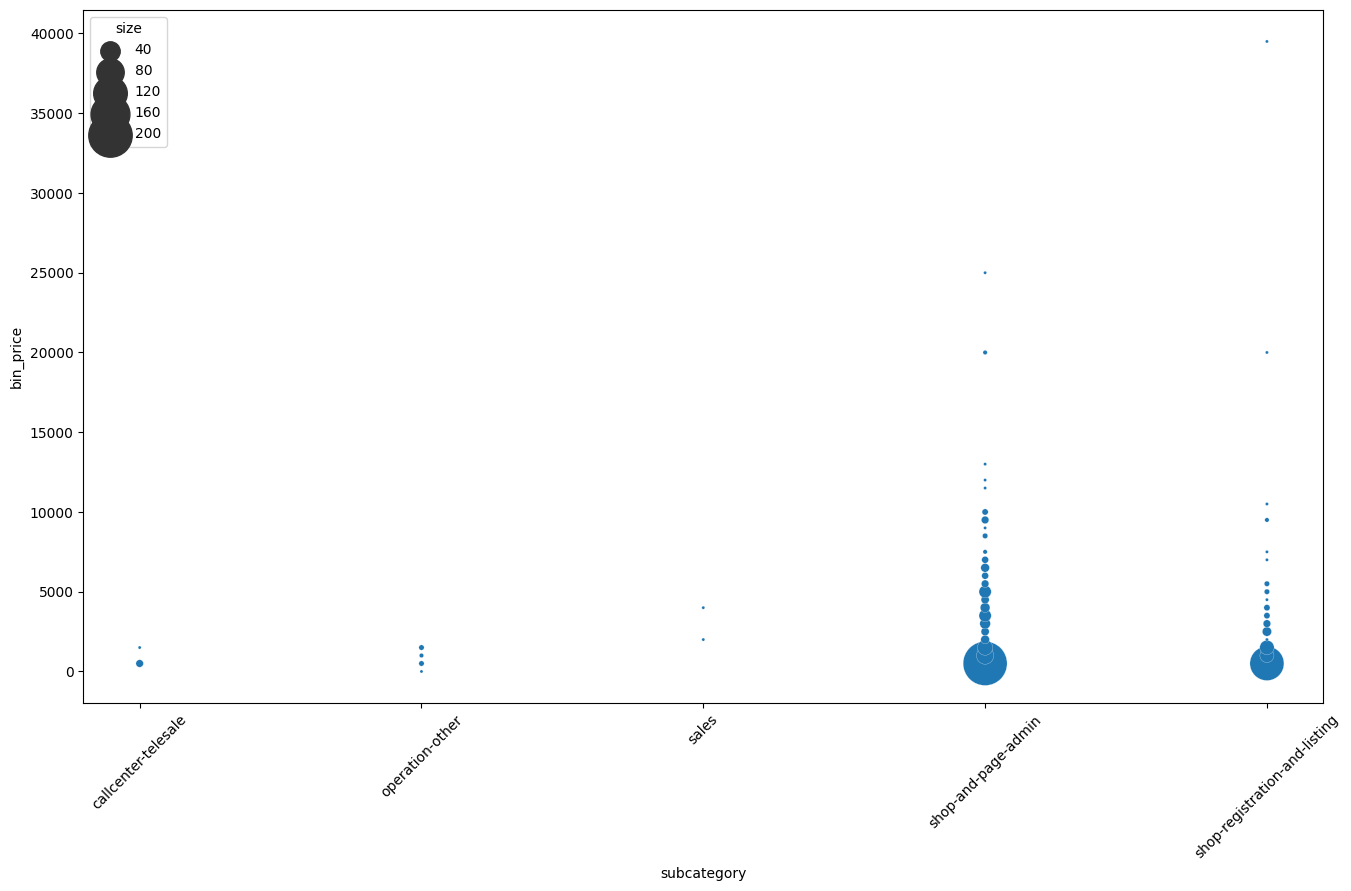

In [26]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=45)
ax = sns.scatterplot(df_group[df_group['category']=='operation'],x="subcategory",y="bin_price", size="size", sizes=(5, 1000))
ax.tick_params(axis='y',which='both')
ax.invert_yaxis()
plt.savefig("price_market-operation.png")

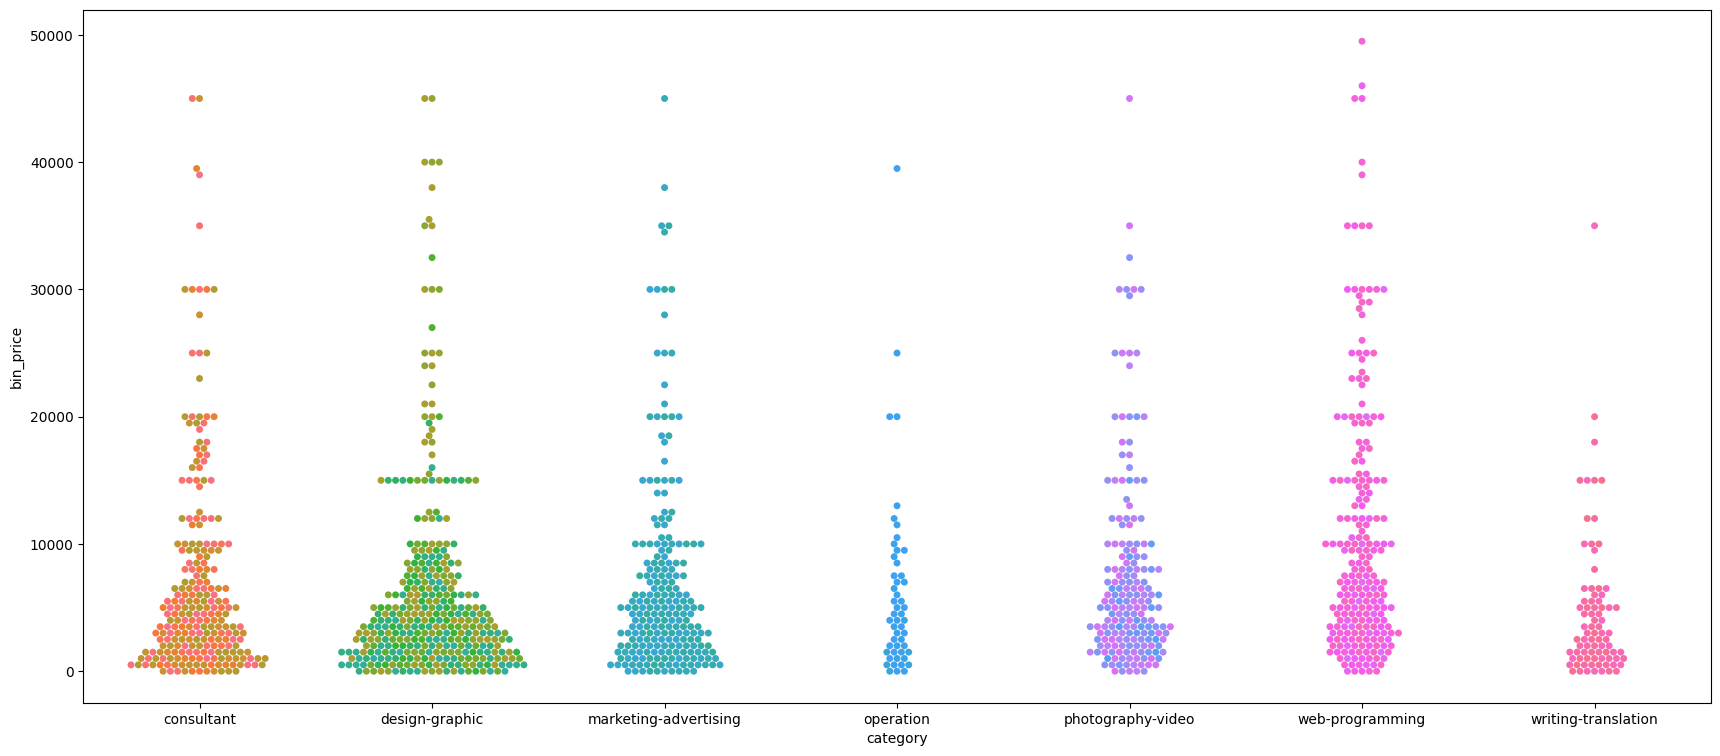

In [29]:
plt.figure(figsize=(21, 9))

ax = sns.swarmplot(df_group,x="category",y="bin_price",hue="subcategory",legend=False)
ax.tick_params(axis='y',which='both')
ax.invert_yaxis()
plt.savefig("swarmplot_price_market.png")